In [3]:
# sklearn : load_breast_cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=7,test_size=0.3)
print(len(x_train),len(x_test))
print(cancer.keys())

398 171
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("클래스별 샘플 갯수")
print("{}".format({n : v for n , v in zip(cancer.target_names,np.bincount(cancer.target))}))

클래스별 샘플 갯수
{'malignant': 212, 'benign': 357}


In [5]:
model = RandomForestClassifier(n_estimators=100,random_state=7)
print(model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)


In [6]:
fittedModel = model.fit(x_train,y_train)
print(fittedModel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)


In [7]:
# train 데이터의 정확도
print(fittedModel.score(x_train,y_train))
# test 데이터의 정확도 : 98%
print(fittedModel.score(x_test,y_test))

1.0
0.9824561403508771


In [8]:
# 그래프 표현
# 수평바 형태로 출력
# 특성 중요도는 x축
# 특성 y축

import matplotlib.pyplot as plt
import numpy as np
plt.rc("font",family="Malgun Gothic")

def plot_feature_importance(model):
    n_feature = cancer.data.shape[1]
    print("n_feature:", n_feature)
    plt.barh(range(n_feature),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_feature),cancer.feature_names)
    plt.ylabel("특성")
    plt.xlabel("특성 중요도")
    plt.show()

n_feature: 30


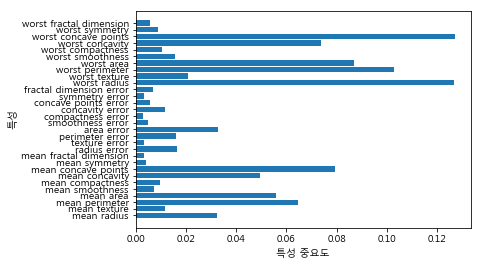

In [9]:
#plt.figure(figsize=(10,40))
plot_feature_importance(fittedModel)